# **TEAM MEMBERS**


# *   Khomesh Kumar Sahu: SM23MTECH11005
# *   Keshvi Dharaiya: SM23MTECH14002
# *   Dipesh Mishra: SM23MTECH11002
# *   Ankith Jain: EM23MTECH14004





# **MOUNT GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT NECESSARY LIBRARIES**

In [ ]:
# pandas: A library for data manipulation and analysis, providing data structures and functions for working with structured data.
import pandas as pd

# numpy: A library for numerical computing, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
import numpy as np

# pickle: A module used for serializing and deserializing Python objects, allowing objects to be saved to and loaded from disk.
import pickle

# matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# scipy.stats: A submodule of SciPy providing statistical functions and distributions for hypothesis testing, probability calculations, etc.
from scipy import stats

# tensorflow: An open-source machine learning framework for building and training neural networks, developed by Google.
import tensorflow as tf

# seaborn: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# pylab: A module in matplotlib that provides a MATLAB-like interface for plotting.
from pylab import rcParams

# sklearn.model_selection: A module in scikit-learn for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

# keras.models: A high-level neural networks API, running on top of TensorFlow or Theano, used for building and training deep learning models.
from keras.models import Model, load_model

# keras.layers: A collection of layers for building neural networks in Keras.
from keras.layers import Input, Dense

# keras.callbacks: Callbacks are objects passed to a model to customize its behavior during training.
from keras.callbacks import ModelCheckpoint, TensorBoard

# keras.regularizers: A module in Keras for applying penalties on layer parameters during optimization to prevent overfitting.
from keras import regularizers

# Importing the StandardScaler class from the preprocessing module in scikit-learn.
from sklearn.preprocessing import StandardScaler

# Importing the train_test_split function from the model_selection module in scikit-learn.
from sklearn.model_selection import train_test_split

# Importing the SMOTE class from the over_sampling module in imbalanced-learn.
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)


# Import the numpy library for numerical computing
import numpy as np

# Import the f1_score function from scikit-learn for evaluating model performance
from sklearn.metrics import f1_score

# Import the TensorFlow library for building and training neural networks
import tensorflow as tf

# Import layers and Model from the TensorFlow.keras module for building the neural network model
from tensorflow.keras import layers, Model

# Import the MeanSquaredError loss function from TensorFlow.keras.losses for calculating the mean squared error loss
from tensorflow.keras.losses import MeanSquaredError


In [ ]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# **Loading the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# **Exploration**

**FRAUD AND NON FRAUD DATA**

In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

**CHECK SHAPE OF FRAUD AND NON FRAUD DATA**

In [ ]:
frauds.shape

(492, 31)

In [ ]:
normal.shape

(284315, 31)

**VISUALIZE THE SCENARIO**

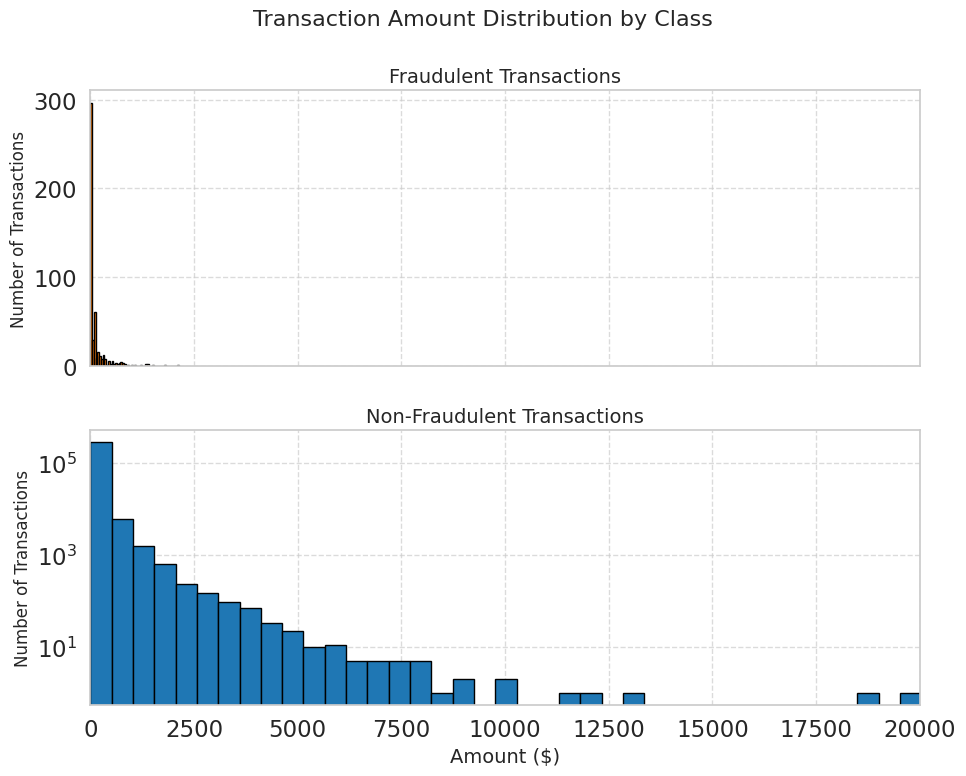

In [ ]:
# Create subplots with shared x-axis
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
f.suptitle('Transaction Amount Distribution by Class', fontsize=16)

# Define histogram parameters
bins = 50
color_normal = '#1f77b4'  # Blue color for normal transactions
color_fraud = '#ff7f0e'   # Orange color for fraud transactions

# Plot histogram for fraud transactions
ax1.hist(frauds.Amount, bins=bins, color=color_fraud, edgecolor='black')
ax1.set_title('Fraudulent Transactions', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot histogram for normal transactions
ax2.hist(normal.Amount, bins=bins, color=color_normal, edgecolor='black')
ax2.set_title('Non-Fraudulent Transactions', fontsize=14)
ax2.set_xlabel('Amount ($)', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# Set shared x-axis properties
plt.xlabel('Amount ($)', fontsize=14)
plt.xlim((0, 20000))
plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.show()


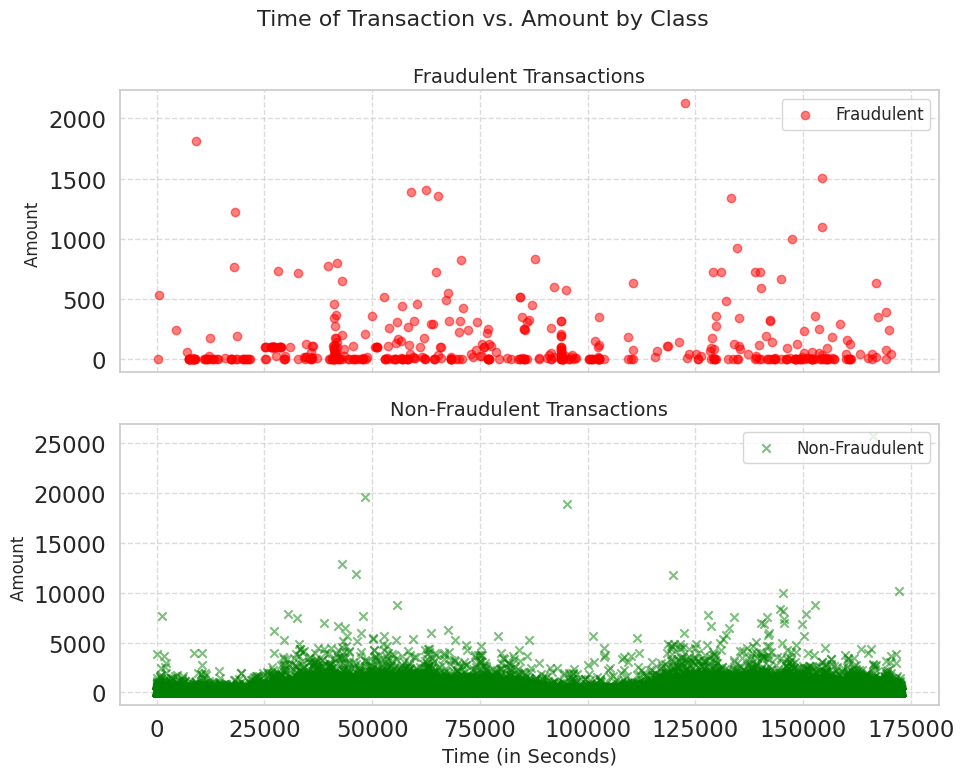

In [ ]:
# Create subplots with shared x-axis
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
f.suptitle('Time of Transaction vs. Amount by Class', fontsize=16)

# Plot scatter plot for fraud transactions
ax1.scatter(frauds.Time, frauds.Amount, color='red', marker='o', alpha=0.5, label='Fraudulent')
ax1.set_title('Fraudulent Transactions', fontsize=14)
ax1.set_ylabel('Amount ', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot scatter plot for normal transactions
ax2.scatter(normal.Time, normal.Amount, color='green', marker='x', alpha=0.5, label='Non-Fraudulent')
ax2.set_title('Non-Fraudulent Transactions', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Amount ', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# Set shared x-axis properties
plt.xlabel('Time (in Seconds)', fontsize=14)

# Add legend
ax1.legend(loc='upper right', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Autoencoders

Certainly! Autoencoders can initially appear perplexing. These models are designed to predict an output that closely resembles the input they receive. Sounds puzzling? It certainly did to me the first time I encountered it.

Let's delve into Autoencoder Neural Networks, a fascinating variant. These autoencoders are tasked with learning to mimic a fundamental mathematical function known as the identity function:

$$\textstyle f_{W,b}(x) \approx x$$

At first glance, attempting to mimic an input might seem straightforward. However, the true essence lies in the desire to uncover a condensed representation of the data, thereby revealing underlying structures. This endeavor is achieved by restricting the number of hidden units within the model. These particular autoencoders are dubbed *undercomplete*.

To visualize this concept, imagine an Autoencoder learning process akin to distilling the essence of an image. Through this process, it aims to capture the most salient features while discarding the extraneous details. The resulting encoded representation, akin to a compressed file, holds the essence of the original input, facilitating tasks such as data compression, denoising, or anomaly detection.

In essence, Autoencoders serve as intricate tools for dimensionality reduction and feature extraction, enabling the discovery of hidden patterns within complex datasets.

## Reconstruction error

Certainly! The optimization process for Autoencoder models revolves around minimizing a specific type of error known as the reconstruction error. This error quantifies how accurately the model can reconstruct its input.

In practical terms, the reconstruction error is typically computed using the traditional squared error metric, expressed as:

$$\textstyle L(x,x') = ||\, x - x'||^2$$

Here, \(x\) represents the original input data, and \(x'\) denotes the reconstructed output generated by the Autoencoder. The aim is to minimize this squared difference between the original and reconstructed data points.

# **PREPARE THE DATA**


In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

Since we have imbalanced dataset, we use oversampling for preprocessing.

In [ ]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [ ]:

X = data.drop('Class',axis=1)
y = data['Class']

X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))

# Oversampling
X_res,y_res = SMOTE().fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)


In [ ]:
X_train.shape

(454904, 29)

# **Building the model**

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [ ]:
# Define the input layer with the specified shape
input_layer = Input(shape=(input_dim, ))

# Encoder layers: mapping the input to a lower-dimensional representation
encoder = Dense(encoding_dim, activation="tanh",  # Fully connected layer with tanh activation function
                activity_regularizer=regularizers.l1(10e-5))(input_layer)  # Regularization to enforce sparsity

# Further reducing the dimensionality of the encoded representation
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)  # Fully connected layer with ReLU activation

# Decoder layers: mapping the encoded representation back to the original input dimension
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)  # Fully connected layer with tanh activation function
decoder = Dense(input_dim, activation='relu')(decoder)  # Fully connected layer with ReLU activation

# Define the autoencoder model, with input and output layers specified
autoencoder = Model(inputs=input_layer, outputs=decoder)


Let's train our model for 100 epochs with a batch size of 32 samples.

In [ ]:
# Define the number of epochs for training
nb_epoch = 100

# Define the batch size for training
batch_size = 32

# Compile the autoencoder model
autoencoder.compile(optimizer='adam',  # Using the Adam optimizer for training
                    loss='mean_squared_error',  # Using mean squared error as the loss function
                    metrics=['accuracy'])  # Metrics to be evaluated during training, accuracy in this case

# ModelCheckpoint callback: saves the best model during training based on a specified metric (here, validation loss)
checkpointer = ModelCheckpoint(filepath="model.h5",  # Filepath to save the best model
                               verbose=0,  # Verbosity mode, 0 for silent
                               save_best_only=True)  # Save only the best model

# TensorBoard callback: used for visualization of the training process and metrics in TensorBoard
tensorboard = TensorBoard(log_dir='./logs',  # Directory to save TensorBoard logs
                          histogram_freq=0,  # Frequency (in epochs) at which to compute activation and weight histograms
                          write_graph=True,  # Write the graph visualization to the logs
                          write_images=True)  # Write model weights to visualize as images in TensorBoard

# Fit the autoencoder model to the training data
history = autoencoder.fit(X_train, X_train,  # Training data and target data are the same (reconstruction task)
                          epochs=nb_epoch,  # Number of epochs for training
                          batch_size=batch_size,  # Batch size for training
                          shuffle=True,  # Shuffle the training data at each epoch
                          validation_data=(X_test, X_test),  # Validation data used for monitoring model performance
                          verbose=1,  # Verbosity mode, 1 for progress bar
                          callbacks=[checkpointer, tensorboard]).history  # Callbacks to be executed during training


Epoch 1/100
14216/14216 [==============================] - 40s 3ms/step - loss: 12.1401 - accuracy: 0.5162 - val_loss: 11.8097 - val_accuracy: 0.5826
Epoch 2/100
   34/14216 [..............................] - ETA: 44s - loss: 11.3030 - accuracy: 0.5708

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14216/14216 [==============================] - 37s 3ms/step - loss: 11.8483 - accuracy: 0.5959 - val_loss: 11.7545 - val_accuracy: 0.6174
Epoch 3/100
14216/14216 [==============================] - 37s 3ms/step - loss: 11.8205 - accuracy: 0.6379 - val_loss: 11.7399 - val_accuracy: 0.6574
Epoch 4/100
14216/14216 [==============================] - 45s 3ms/step - loss: 11.8114 - accuracy: 0.6658 - val_loss: 11.7368 - val_accuracy: 0.6665
Epoch 5/100
14216/14216 [==============================] - 37s 3ms/step - loss: 11.8073 - accuracy: 0.6757 - val_loss: 11.7314 - val_accuracy: 0.6833
Epoch 6/100
14216/14216 [==============================] - 36s 3ms/step - loss: 11.8049 - accuracy: 0.6852 - val_loss: 11.7289 - val_accuracy: 0.6871
Epoch 7/100
14216/14216 [==============================] - 37s 3ms/step - loss: 11.8034 - accuracy: 0.6887 - val_loss: 11.7350 - val_accuracy: 0.6802
Epoch 8/100
14216/14216 [==============================] - 37s 3ms/step - loss: 11.8022 - accuracy: 0.6907 - val

In [ ]:
autoencoder = load_model('model.h5')

# Evaluation

In [ ]:
predictions = autoencoder.predict(X_test)

3554/3554 [==============================] - 6s 2ms/step


In [ ]:
# FInd mean square error
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

**Visualize error**

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,113726.000000,113726.000000
mean,11.692913,0.500994
std,25.101178,0.500001
min,0.062685,0.000000
25%,0.388746,0.000000
50%,0.917478,1.000000
75%,8.111411,1.000000
max,361.052032,1.000000


**RECONSTRUCTION ERROR WITHOUT FRAUD**

Reconstruction Error for Normal Transactions:
[0.58607768 0.67467973 0.3633527  ... 0.31408402 0.37265565 0.36470848]
0.06268533768004905
9.924898919130566


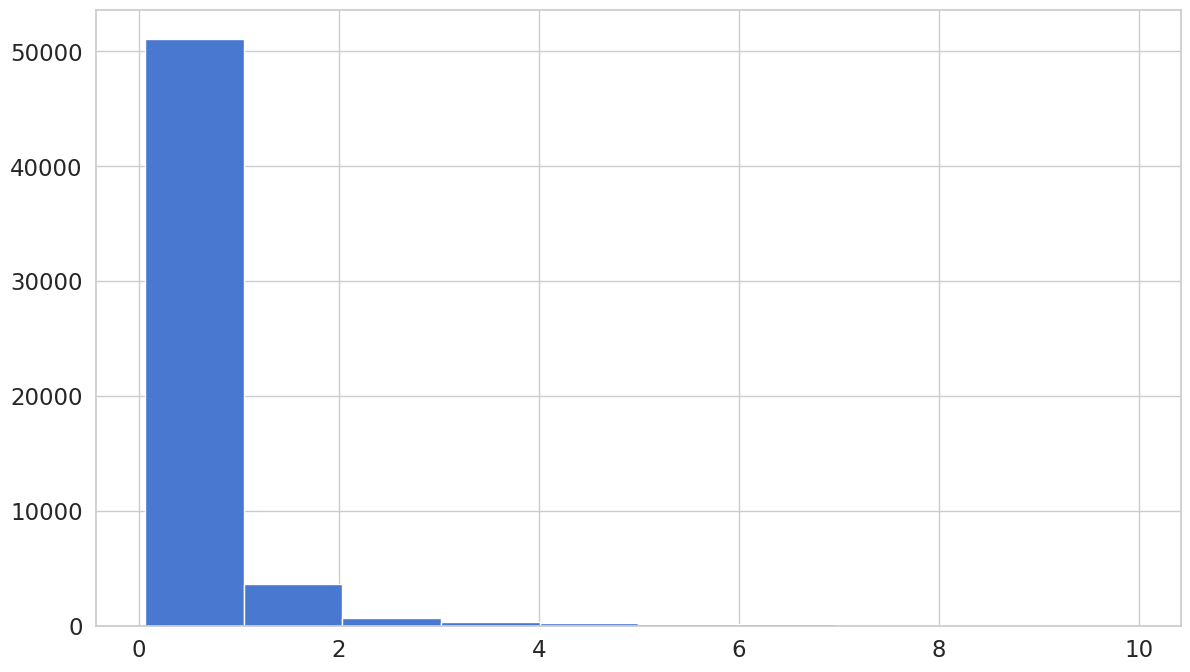

In [ ]:
# Create a new figure
fig = plt.figure()

# Add a subplot to the figure
ax = fig.add_subplot(111)

# Filter the error dataframe to select only normal transactions with reconstruction error less than 10
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]

# Plot a histogram of the reconstruction errors for normal transactions
# Use 10 bins for grouping the data
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

# Print information about the reconstruction errors for normal transactions
print("Reconstruction Error for Normal Transactions:")
print(normal_error_df.reconstruction_error.values)  # Print the reconstruction errors
print(min(normal_error_df.reconstruction_error.values))  # Print the minimum reconstruction error
print(max(normal_error_df.reconstruction_error.values))  # Print the maximum reconstruction error


**Reconstruction error with fraud**

Reconstruction Error for Fraud Transactions:
[ 3.23896314 10.61183237 15.25327899 ...  4.64397183  0.37648941
 22.84232373]
0.08804592828745059
248.48568491395054


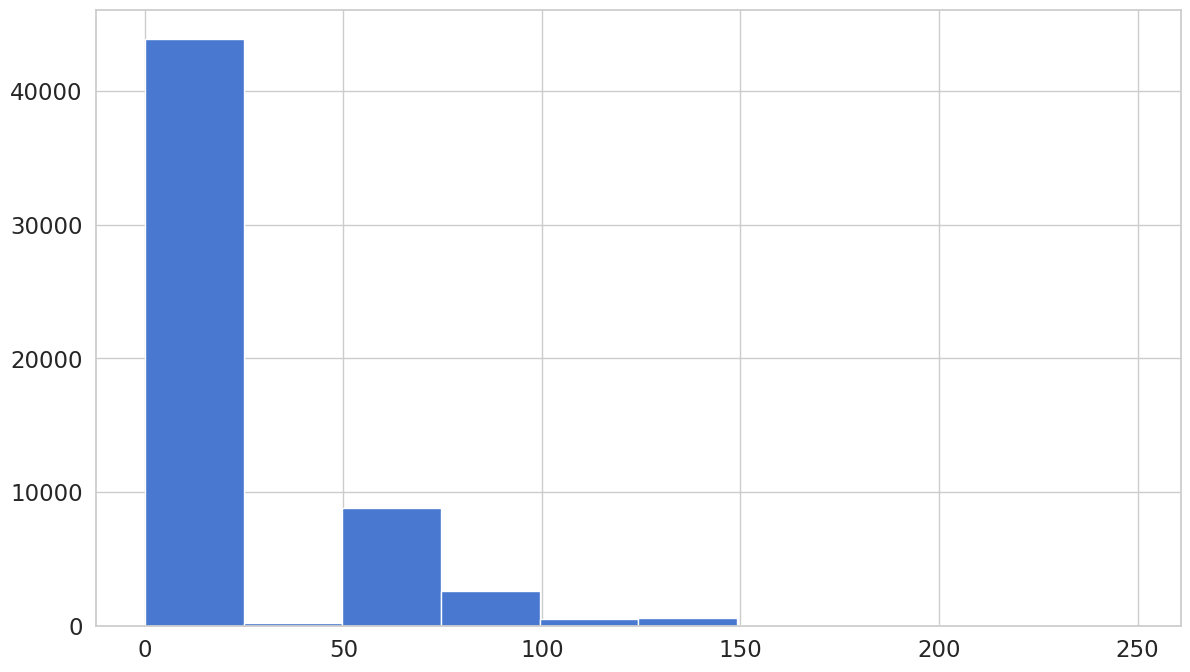

In [ ]:
# Create a new figure
fig = plt.figure()

# Add a subplot to the figure
ax = fig.add_subplot(111)

# Filter the error dataframe to select only fraud transactions
fraud_error_df = error_df[error_df['true_class'] == 1]

# Plot a histogram of the reconstruction errors for fraud transactions
# Use 10 bins for grouping the data
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

# Print information about the reconstruction errors for fraud transactions
print("Reconstruction Error for Fraud Transactions:")
print(fraud_error_df.reconstruction_error.values)  # Print the reconstruction errors
print(min(fraud_error_df.reconstruction_error.values))  # Print the minimum reconstruction error
print(max(fraud_error_df.reconstruction_error.values))  # Print the maximum reconstruction error


# Prediction

Setting up one threshold value and calculating F1 score.

In [ ]:
threshold = 2.9

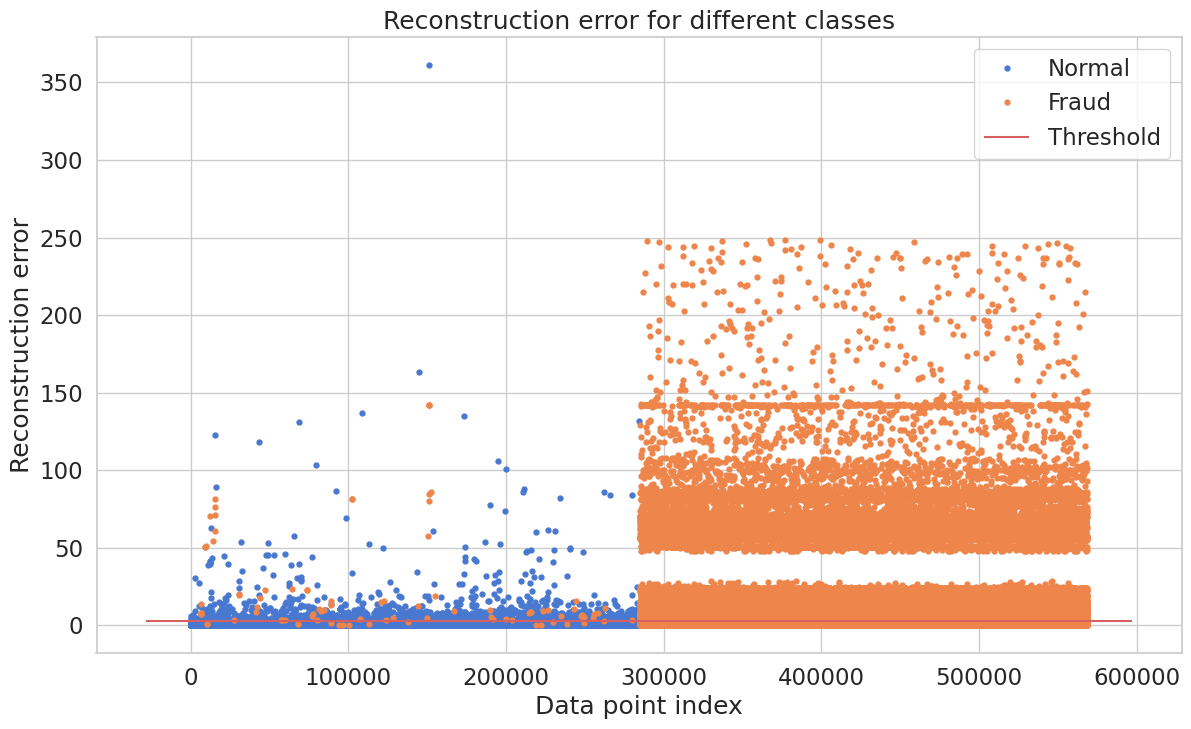

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

I know, that chart might be a bit deceiving. Let's have a look at the confusion matrix:

Precision: 0.9710777973325417
Recall: 0.8037945801741084
F1 Score: 0.8795528966649702


Text(0.5, 90.24999999999997, 'Predicted class')

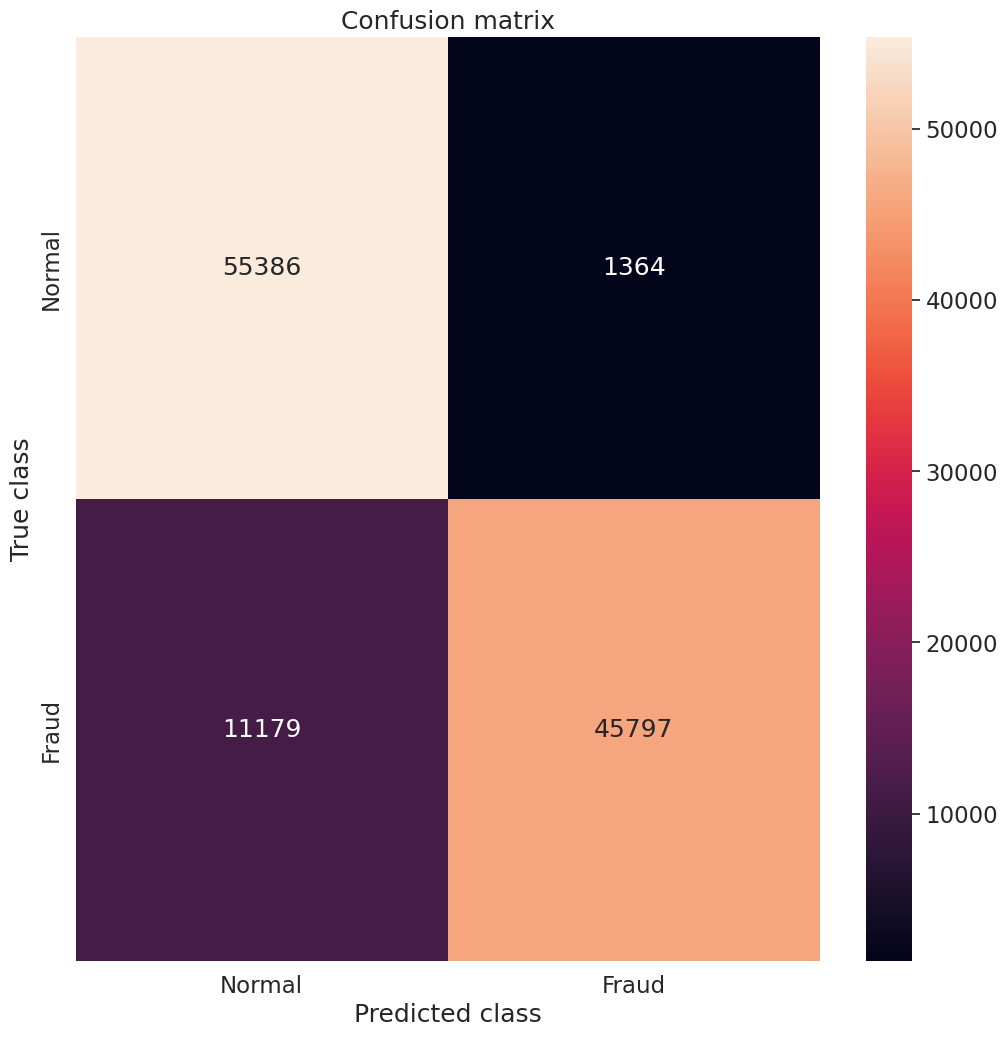

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)


# Compute precision, recall, and F1 score from the confusion matrix
precision = precision_score(error_df.true_class, y_pred)
recall = recall_score(error_df.true_class, y_pred)
f1 = f1_score(error_df.true_class, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

# **Variational Auoencoder**



In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Drop 'Time' column
data = data.drop('Time', axis=1)

# Oversampling using SMOTE
X = data.drop('Class', axis=1)
y = data['Class']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Variational Autoencoder
latent_dim = 2

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

encoder_inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32, activation='relu')(latent_inputs)
x = layers.Dense(64, activation='relu')(x)
decoder_outputs = layers.Dense(X_train.shape[1], activation='sigmoid')(x)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")

_, _, z = encoder(encoder_inputs)
decoder_outputs = decoder(z)
vae = Model(encoder_inputs, decoder_outputs, name="vae")

# Loss function
reconstruction_loss = MeanSquaredError()(encoder_inputs, decoder_outputs)
kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
vae_loss = reconstruction_loss + kl_loss
vae.add_loss(vae_loss)

# Compile and train VAE
vae.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2)

# Predictions
X_test_pred = vae.predict(X_test)

Epoch 1/100
11373/11373 [==============================] - 39s 3ms/step - loss: 1.0012 - val_loss: 1.0022
Epoch 2/100
11373/11373 [==============================] - 40s 4ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 3/100
11373/11373 [==============================] - 40s 4ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 4/100
11373/11373 [==============================] - 40s 3ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 5/100
11373/11373 [==============================] - 41s 4ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 6/100
11373/11373 [==============================] - 40s 4ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 7/100
11373/11373 [==============================] - 37s 3ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 8/100
11373/11373 [==============================] - 40s 3ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 9/100
11373/11373 [==============================] - 41s 4ms/step - loss: 0.9994 - val_loss: 1.0022
Epoch 10/100
11373/11373 [====================

**FIND THE BEST THRESHOLD AND CALCULATE F1 SCORE**

In [ ]:
# Range of thresholds to try
thresholds = np.linspace(0, 5, 100)

# Lists to store F1 scores
f1_scores = []

# Calculate F1 score for each threshold
for threshold in thresholds:
    y_pred = (reconstruction_error > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Find the best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print("Best F1 Score:", best_f1_score)


Best F1 Score: 0.6675492964347225


# Final Results:--

**The autoencoder achieved an F1 score of 0.8795, indicating strong performance in detecting fraudulent transactions within the dataset. On the other hand, the variational autoencoder achieved a slightly lower F1 score of 0.6675, suggesting comparatively less effective performance in identifying fraudulent transactions. This implies that the traditional autoencoder model outperformed the variational autoencoder in this specific task of fraud detection.**